<a href="https://colab.research.google.com/github/sidchaubey/cv/blob/master/Basic_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
!wget 'https://github.com/zalandoresearch/fashion-mnist/tree/master/data'

--2021-01-05 07:57:16--  https://github.com/zalandoresearch/fashion-mnist/tree/master/data
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data.1’

data.1                  [ <=>                ]  75.98K  --.-KB/s    in 0.02s   

2021-01-05 07:57:16 (3.86 MB/s) - ‘data.1’ saved [77799]



In [9]:
df = pd.read_csv("./sample_data/mnist_test.csv")

In [19]:
tf.__version__

'2.4.0'

In [43]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [45]:
mnist = tf.keras.datasets.mnist #28*28

# a = mnist.load_data()
# print(a)
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [21]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


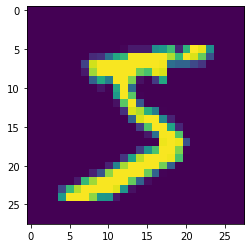

In [24]:
plt.imshow(x_train[0])
plt.show()

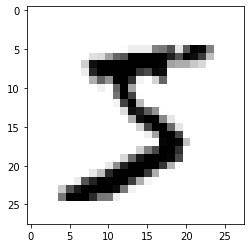

In [25]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [26]:
x_train = tf.keras.utils.normalize(x_train, axis =1)

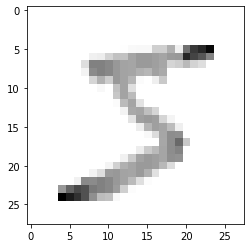

In [30]:
plt.imshow(x_train[0], cmap=plt.cm.binary);

In [46]:
dir(tf.keras.models)

['Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'clone_model',
 'load_model',
 'model_from_config',
 'model_from_json',
 'model_from_yaml',
 'save_model']

In [49]:
model = tf.keras.models.Sequential()[]
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))# Used for prob dist

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3)

AttributeError: ignored

In [33]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 61.9605 - accuracy: 0.9592
61.960487365722656 0.9592000246047974


In [34]:
model.save("epic_num_reader.model")

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [36]:
new_model = tf.keras.models.load_model("epic_num_reader.model")

In [44]:
predictions = new_model.predict([x_test])
predictions

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [38]:
import numpy as np

print(np.argmax(predictions[0]))

7


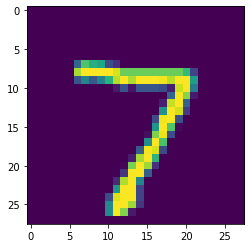

In [40]:
plt.imshow(x_test[0]);

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
